In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import imp

In [46]:
parameters = imp.load_source('parameters', '../../../data/raw/parameters.py')

In [47]:
df = pd.read_csv("../../../data/processed/full/std/per_opponent/main.csv")
df.head()

,Player index,Opponent index,complete,Score,P(C|CC),P(C|CD),P(C|DC),P(C|DD),P(CC),P(CD),P(DC),P(DD),residual,alpha,beta,chi,computed_residual,computed_alpha,computed_beta,computed_chi
0,0,0,False,718800,0.999498,NaN,NaN,0.20,0.99750,0.00000,0.000000,0.002500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,True,359460,0.999498,1.000000,0.0,0.25,0.99700,0.00050,0.000500,0.002000,1.332843e-07,-0.000059,-0.000059,-1.000000,1.332843e-07,-0.000059,-0.000059,-1.000000
2,0,2,True,120420,0.666667,1.000000,0.0,0.00,0.00150,0.00150,0.000500,0.996500,5.882353e-02,-0.039216,-0.039216,-1.000000,5.882353e-02,-0.039216,-0.039216,-1.000000
3,0,3,True,359280,0.999498,1.000000,0.0,0.25,0.99650,0.00100,0.000500,0.002000,1.332843e-07,-0.000059,-0.000059,-1.000000,1.332843e-07,-0.000059,-0.000059,-1.000000
4,0,4,True,367454,0.833333,0.833333,0.0,0.00,0.00155,0.00145,0.515117,0.481883,1.633987e-03,-0.017647,-0.050980,-2.888889,1.633987e-03,-0.017647,-0.050980,-2.888889


In [48]:
strategy_names = [player.name for player in parameters.PLAYER_GROUPS["full"]]
strategies_of_interest = imp.load_source('replicator_dynamics', '../replicator_dynamics/main.py').strategies_of_interest

In [49]:
indices_of_interest = [(strategy_names.index(player), player) for player in strategies_of_interest]
indices_of_interest

[(195, 'ZD-GTFT-2'),
 (196, 'ZD-GEN-2'),
 (191, 'ZD-Extort-2'),
 (56, 'EvolvedLookerUp2_2_2'),
 (50, 'Evolved ANN 5'),
 (169, 'Tit For Tat'),
 (184, 'Win-Stay Lose-Shift')]

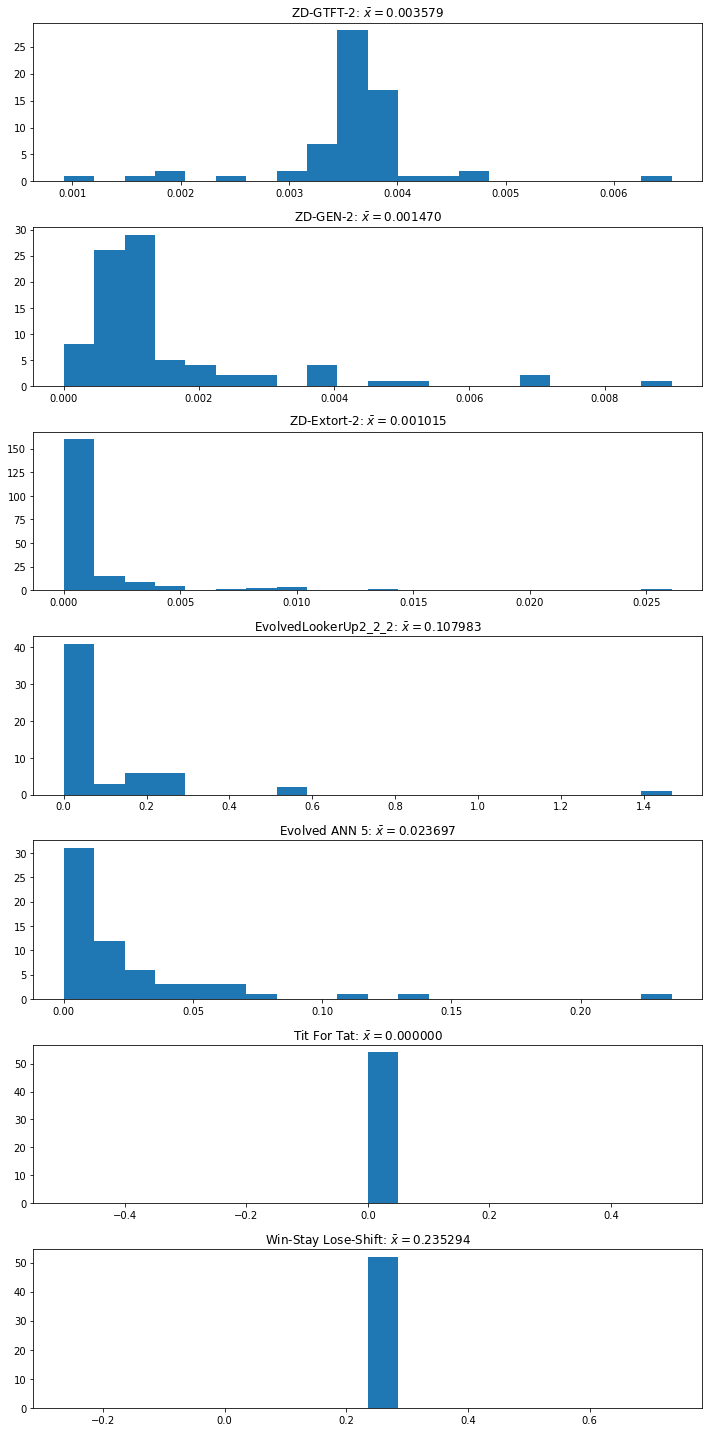

In [62]:
fig, axarr = plt.subplots(len(strategies_of_interest), figsize=(10, 20))

for ax, (i, name) in zip(axarr, indices_of_interest):
    
    values = df[df["Player index"] == i]["residual"].dropna()
    ax.hist(values, bins=20)
    ax.set_title(f"{name}: $\\bar x=${np.mean(values):01f}")
fig.tight_layout()